<a href="https://colab.research.google.com/github/yjyg1215/Project_MachineLearning/blob/main/anime_recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제: 머신러닝을 활용한 애니메이션 추천 시스템

##1. 기획 배경 및 문제 정의

애니메이션 시장은 굉장히 큼

최근들어 애니메이션 산업은 DVD 등의 매체를 통한 배급에서 OTT를 통한 배급으로 전환되는 추세다.

OTT를 통해 애니메이션을 시청하는 사람이 늘어나는 만큼, 추천시스템 기반을 잘 마련하는 것이 중요하게 됨.

가설
1. 장르에 따라 유저의 평가 점수 분포가 다르다.
2. 타입에 따라 유저의 평가 점수 분포가 다르다.
3. 에피소드의 개수가 많을수록 유저의 평가 점수가 높다.
4. 원작 형태에 따라 유저의 평가 점수 분포가 다르다.
5. 영상 길이가 짧을수록 유저의 평가 점수가 낮다.
6. 연령 등급에 따라 유저의 평가 점수 분포가 다르다.
7. 리스트에 추가한 인원이 많을수록 유저의 평가 점수도 높다.
8. 커뮤니티 회원 수가 많을수록 유저의 평가 점수도 높다.
9. 좋아요 수가 많으면 유저의 평가 점수도 높다.
10. 끝까지 다 본 사람 수가 많으면 유저 평가 점수도 높다.
11. 보류중인 사람 수가 많으면 유저 평가 점수가 낮다.
12. 하차한 사람 수가 많으면 유저 평가 점수가 낮다.
13. 볼 예정인 사람 수가 많으면 유저 평가 점수가 높다.

##2. 전처리 및 EDA

In [98]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.2 MB/s 
     |████████████████████████████████| 303 kB 55.0 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 690 kB 45.9 MB/s 
     |████████████████████████████████| 3.1 MB 49.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 296 kB 52.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=4065161a94ca433f8c286cc2f7c32bc8ccc2a45a59caa9f7b3de14586afa2787
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: requests
    Found existing install

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

###1) anime.csv

* `MAL_ID`: MyAnimelist ID of the anime. (e.g. 1)
* `Name`: full name of the anime. (e.g. Cowboy Bebop)
* `Score`: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
* `Genres`: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
* `English name`: full name in english of the anime. (e.g. Cowboy Bebop)
* `Japanese name`: full name in japanses of the anime. (e.g. カウボーイビバップ)
* `Type`: TV, movie, OVA, etc. (e.g. TV)
* `Episodes`: number of chapters. (e.g. 26)
* `Aired`: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)
* `Premiered`: season premiere. (e.g. Spring 1998)
* `Producers`: comma separated list of produducers (e.g. Bandai Visual)
* `Licensors`: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)
* `Studios`: comma separated list of studios (e.g. Sunrise)
* `Source`: Manga, Light novel, Book, etc. (e.g Original)
* `Duration`: duration of the anime per episode (e.g 24 min. per ep.)
* `Rating`: age rate (e.g. R - 17+ (violence & profanity))
* `Ranked`: position based in the score. (e.g 28)
* `Popularity`: position based in the the number of users who have added the anime to their list. (e.g 39)
* `Members`: number of community members that are in this anime's "group". (e.g. 1251960)
* `Favorites`: number of users who have the anime as "favorites". (e.g. 61,971)
* `Watching`: number of users who are watching the anime. (e.g. 105808)
* `Completed`: number of users who have complete the anime. (e.g. 718161)
* `On-Hold`: number of users who have the anime on Hold. (e.g. 71513)
* `Dropped`: number of users who have dropped the anime. (e.g. 26678)
* `Plan to Watch`: number of users who plan to watch the anime. (e.g. 329800)
* `Score-10`: number of users who scored 10. (e.g. 229170)
* `Score-9`: number of users who scored 9. (e.g. 182126)
* `Score-8`: number of users who scored 8. (e.g. 131625)
* `Score-7`: number of users who scored 7. (e.g. 62330)
* `Score-6`: number of users who scored 6. (e.g. 20688)
* `Score-5`: number of users who scored 5. (e.g. 8904)
* `Score-4`: number of users who scored 4. (e.g. 3184)
* `Score-3`: number of users who scored 3. (e.g. 1357)
* `Score-2`: number of users who scored 2. (e.g. 741)
* `Score-1`: number of users who scored 1. (e.g. 1580)

In [7]:
anime=pd.read_csv("/content/drive/MyDrive/archive/anime.csv")

df_anime=anime.copy()
df_anime.head().T

,0,1,2,3,4
MAL_ID,1,5,6,7,8
Name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
Score,8.78,8.39,8.24,7.27,6.98
Genres,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","Action, Drama, Mystery, Sci-Fi, Space","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Action, Mystery, Police, Supernatural, Drama, ...","Adventure, Fantasy, Shounen, Supernatural"
English name,Cowboy Bebop,Cowboy Bebop:The Movie,Trigun,Witch Hunter Robin,Beet the Vandel Buster
Japanese name,カウボーイビバップ,カウボーイビバップ 天国の扉,トライガン,Witch Hunter ROBIN (ウイッチハンターロビン),冒険王ビィト
Type,TV,Movie,TV,TV,TV
Episodes,26,1,26,26,52
Aired,"Apr 3, 1998 to Apr 24, 1999","Sep 1, 2001","Apr 1, 1998 to Sep 30, 1998","Jul 2, 2002 to Dec 24, 2002","Sep 30, 2004 to Sep 29, 2005"
Premiered,Spring 1998,Unknown,Spring 1998,Summer 2002,Fall 2004


In [8]:
print("anime's shape: ",df_anime.shape)

anime's shape:  (17562, 35)


In [9]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [10]:
#수치형 데이터인데 데이터타입이 object인 컬럼은 int 및 float로 변환

scores=['Score-1','Score-2','Score-3','Score-4','Score-5','Score-6','Score-7','Score-8','Score-9','Score-10']
df_anime=df_anime.replace("Unknown",'0')
for col in scores:
  df_anime[col]=df_anime[col].apply(lambda x: x.replace(".0",""))
df_anime['Score']=df_anime['Score'].astype(float)
df_anime['Episodes']=df_anime['Episodes'].astype(int)
df_anime['Score-1']=df_anime['Score-1'].astype(int)
df_anime['Score-2']=df_anime['Score-2'].astype(int)
df_anime['Score-3']=df_anime['Score-3'].astype(int)
df_anime['Score-4']=df_anime['Score-4'].astype(int)
df_anime['Score-5']=df_anime['Score-5'].astype(int)
df_anime['Score-6']=df_anime['Score-6'].astype(int)
df_anime['Score-7']=df_anime['Score-7'].astype(int)
df_anime['Score-8']=df_anime['Score-8'].astype(int)
df_anime['Score-9']=df_anime['Score-9'].astype(int)
df_anime['Score-10']=df_anime['Score-10'].astype(int)

df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          17562 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17562 non-null  int64  
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  object 
 10  Producers      17562 non-null  object 
 11  Licensors      17562 non-null  object 
 12  Studios        17562 non-null  object 
 13  Source         17562 non-null  object 
 14  Duration       17562 non-null  object 
 15  Rating         17562 non-null  object 
 16  Ranked         17562 non-null  object 
 17  Popularity     17562 non-null  int64  
 18  Member

In [11]:
#Genre 컬럼 나누기

genres=['Action', 'Adventure','Comedy',
    'Slice of Life','Drama','Sci-Fi',
    'Game','Harem','Military','Space','Music', 'Mecha',
     'Historical', 'Mystery', 'School', 'Hentai', 'Fantasy', 'Horror',
     'Kids', 'Sports', 'Magic', 'Romance']

for genre in genres:
  df_anime[genre]=[0]*len(df_anime)
  df_anime.loc[df_anime['Genres'].str.contains(genre,na=False),genre]=1

In [12]:
#Premiered 컬럼 연도와 계절로 나누기

df_anime['Year']=df_anime['Premiered'].apply(lambda x: x[-4:])
df_anime['Season']=df_anime['Premiered'].apply(lambda x: x[:-5])

In [13]:
#Duration 컬럼 단위를 분으로 나타내기

du=[]
for row in df_anime['Duration']:
  tmp=row.split(' ')
  min=0
  for i in range(len(tmp)):
    if tmp[i]=='hr.':
      min=min+60*int(tmp[i-1])
    elif tmp[i]=='min.':
      min=min+int(tmp[i-1])
  du.append(min)

df_anime['Duration']=du
df_anime['Duration'].head()

0     24
1    115
2     24
3     25
4     23
Name: Duration, dtype: int64

In [14]:
#Score 컬럼 결측치 조건부로 채우기

scores=['Score-1','Score-2','Score-3','Score-4','Score-5','Score-6','Score-7','Score-8','Score-9','Score-10']
for i in df_anime.index:
  if df_anime.loc[i,'Score']==0:
    sum=0
    n=0
    for j in range(10):
      n+=df_anime.loc[i,scores[j]]
      sum+=(df_anime.loc[i,scores[j]])*(j+1)
    if n!=0:
      df_anime.loc[i,'Score']=sum/n

In [15]:
# #Episodes 컬럼 범위별로 묶어주기 (1:0,2~8:1,9~20:2,21~30:3,31~:4)

# ep=[]
# for row in df_anime['Episodes']:
#   if row==1:
#     ep.append(0)
#   elif row<9:
#     ep.append(1)
#   elif row<21:
#     ep.append(2)
#   elif row<31:
#     ep.append(3)
#   else:
#     ep.append(4)

# df_anime['Episodes']=ep
# df_anime['Episodes'].unique()

In [87]:
#Studios 카디널리티 확인

df_anime['Studios'].nunique()

1090

In [16]:
#1차적으로 필요하지 않은 컬럼들은 drop

df_anime.drop(columns=['Name','English name','Japanese name'],inplace=True) #MAL_ID가 있으므로 이름 관련 컬럼은 drop
df_anime.drop('Aired',axis=1,inplace=True) #Premiered와 비슷한 내용이므로 drop
df_anime.drop('Premiered',axis=1,inplace=True) #Premiered를 Year과 Season으로 나눠줬으므로 drop
df_anime.drop('Ranked',axis=1,inplace=True) #Score 기반으로 순위를 매긴 것이므로 Score을 남겨두고 Ranked는 drop
df_anime.drop('Genres',axis=1,inplace=True) #장르 각각 새로운 컬럼으로 나눠줬으므로 기존의 Genres는 drop
df_anime.drop('Licensors',axis=1,inplace=True) #Licensors를 활용해보고 싶었으나 이미 컬럼의 수가 많기도 하고, 상대적으로 중요도가 떨어질 것으로 예상되어 drop
df_anime.drop('Producers',axis=1,inplace=True) #Producers를 활용해보고 싶었으나, 어느 Producer가 기여도가 높은지 알 수 없어 전처리하기 어려울 것으로 판단되므로 drop
df_anime.drop('Episodes',axis=1,inplace=True) #Episodes는 카디널리티가 높고, 범위를 나누어 인코딩해도 타겟과의 연관성이 낮은 것으로 보이므로 drop

In [17]:
df_anime.head().T

,0,1,2,3,4
MAL_ID,1,5,6,7,8
Score,8.78,8.39,8.24,7.27,6.98
Type,TV,Movie,TV,TV,TV
Episodes,26,1,26,26,52
Studios,Sunrise,Bones,Madhouse,Sunrise,Toei Animation
Source,Original,Original,Manga,Original,Manga
Duration,24,115,24,25,23
Rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),PG-13 - Teens 13 or older,PG-13 - Teens 13 or older,PG - Children
Popularity,39,518,201,1467,4369
Members,1251960,273145,558913,94683,13224


In [18]:
df_anime.nunique().sort_values(ascending=False)

MAL_ID           17562
Popularity       11755
Members           9508
Completed         7822
Plan to Watch     7055
Score-7           4933
Score-8           4515
Score-6           4236
Score-9           3645
Watching          3580
Score-10          3379
Score-5           3288
Score             3144
Dropped           3035
On-Hold           2915
Score-4           2235
Favorites         1543
Score-3           1506
Score-2           1110
Studios           1090
Score-1           1084
Episodes           201
Duration           150
Year                62
Source              16
Rating               7
Type                 7
Season               5
Comedy               2
Slice of Life        2
Action               2
Romance              2
Magic                2
Sports               2
Kids                 2
Horror               2
Fantasy              2
Hentai               2
School               2
Mystery              2
Historical           2
Mecha                2
Music                2
Adventure  

In [19]:
df_anime.describe()

,MAL_ID,Score,Episodes,Duration,Popularity,Members,Favorites,Watching,Completed,On-Hold,...,Historical,Mystery,School,Hentai,Fantasy,Horror,Kids,Sports,Magic,Romance
count,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,...,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000
mean,21477.192347,6.123983,11.186881,23.757545,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,...,0.065141,0.041396,0.093497,0.076757,0.187052,0.026307,0.151748,0.040599,0.061553,0.108131
std,14900.093170,1.296979,46.688414,25.096817,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,...,0.246781,0.199210,0.291136,0.266212,0.389964,0.160051,0.358787,0.197365,0.240349,0.310555
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5953.500000,5.492537,1.000000,4.000000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22820.000000,6.230000,1.000000,23.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35624.750000,6.920000,12.000000,27.000000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48492.000000,10.000000,3057.000000,167.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###2) rating_complete.csv

* `user_id`: non identifiable randomly generated user id.
* `anime_id`: - MyAnimelist ID of the anime that this user has rated.
* `rating`: rating that this user has assigned.

In [20]:
rating=pd.read_csv("/content/drive/MyDrive/archive/rating_complete.csv")
rating.shape

(57633278, 3)

In [21]:
df_rating=rating.copy()

df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [22]:
df_rating.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [23]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [24]:
df_rating.duplicated().sum()

0

In [25]:
ra_mean=df_rating.groupby('user_id').mean()

In [26]:
df_rating.nunique().sort_values(ascending=False)

user_id     310059
anime_id     16872
rating          10
dtype: int64

In [27]:
ra_mean.describe()['rating']

count    310059.000000
mean          7.927370
std           0.942954
min           1.000000
25%           7.372807
50%           7.916667
75%           8.500000
max          10.000000
Name: rating, dtype: float64

In [28]:
ra_count=df_rating.groupby('user_id').count()

In [29]:
ra_count['anime_id'].max()

15455

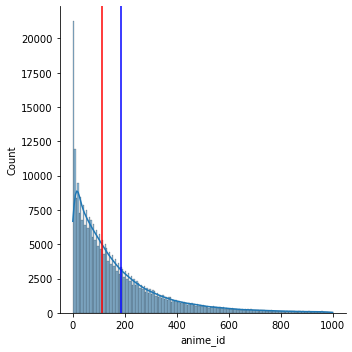

In [30]:
sns.displot(ra_count[ra_count['anime_id']<1000].anime_id,kde=True)
plt.axvline(ra_count['anime_id'].mean(),color='blue')
plt.axvline(ra_count['anime_id'].median(),color='red')
plt.show()

-> 평균적으로 한 유저당 200개 정도의 애니메이션을 평가함.

In [31]:
#코랩에서 5700만개의 데이터를 다루려니 계속 초기화돼서 100만개정도로 추려보기로 함.

df_rating=df_rating.sample(frac=0.02)

In [32]:
df_rating.nunique()

user_id     232185
anime_id     13113
rating          10
dtype: int64

In [33]:
df_rating.shape

(1152666, 3)

In [34]:
ra_count=df_rating.groupby('user_id').count()
ra_count['anime_id'].max()

307

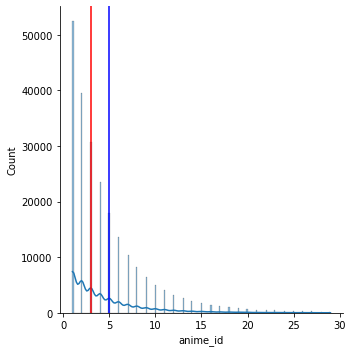

In [35]:
sns.displot(ra_count[ra_count['anime_id']<30].anime_id,kde=True)
plt.axvline(ra_count['anime_id'].mean(),color='blue')
plt.axvline(ra_count['anime_id'].median(),color='red')
plt.show()

-> 아무 조건 없이 100만개의 데이터를 추출하니, 기존에 한 유저당 약 200개의 평가 데이터가 있었는데 5개로 줄어버렸음. 유저의 수를 10000명정도 추출하는 방식으로 다시 샘플링하는 것이 좋을 것 같음.

In [36]:
#유저 약 10000명으로 추리기

user_idx=pd.DataFrame(rating['user_id'].unique()).sample(frac=0.033)
df_rating=rating[rating['user_id'].isin(user_idx[0])]

In [37]:
df_rating.shape

(1891688, 3)

In [38]:
df_rating.nunique()

user_id     10232
anime_id    13965
rating         10
dtype: int64

In [39]:
ra_count=df_rating.groupby('user_id').count()
ra_count['anime_id'].max()

6485

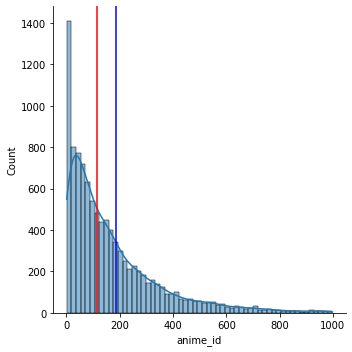

In [40]:
sns.displot(ra_count[ra_count['anime_id']<1000].anime_id,kde=True)
plt.axvline(ra_count['anime_id'].mean(),color='blue')
plt.axvline(ra_count['anime_id'].median(),color='red')
plt.show()

-> 기존 데이터와 비슷한 분포로 샘플링 된 것을 확인할 수 있음.

###3) anime+rating_complete

In [41]:
df_anime.columns

Index(['MAL_ID', 'Score', 'Type', 'Episodes', 'Studios', 'Source', 'Duration',
       'Rating', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9', 'Score-8',
       'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2',
       'Score-1', 'Action', 'Adventure', 'Comedy', 'Slice of Life', 'Drama',
       'Sci-Fi', 'Game', 'Harem', 'Military', 'Space', 'Music', 'Mecha',
       'Historical', 'Mystery', 'School', 'Hentai', 'Fantasy', 'Horror',
       'Kids', 'Sports', 'Magic', 'Romance', 'Year', 'Season'],
      dtype='object')

In [42]:
df=df_anime.merge(df_rating,left_on='MAL_ID',right_on='anime_id',how='inner')
df.shape

(1891688, 53)

In [101]:
profile = ProfileReport(df, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

-> Studios 컬럼은 카디널리티가 높아서 drop하는 게 좋을 듯함. Year 컬럼과 Season 컬럼은 Aired 컬럼에서 조건부로 결측치를 채워줘야 할 듯. 그리고 Year 컬럼은 카디널리티를 줄이기 위해 10년 단위로 나눠서 인코딩하기.

In [43]:
df.head().T

,0,1,2,3,4
MAL_ID,1,1,1,1,1
Score,8.78,8.78,8.78,8.78,8.78
Type,TV,TV,TV,TV,TV
Episodes,26,26,26,26,26
Studios,Sunrise,Sunrise,Sunrise,Sunrise,Sunrise
Source,Original,Original,Original,Original,Original
Duration,24,24,24,24,24
Rating,R - 17+ (violence & profanity),R - 17+ (violence & profanity),R - 17+ (violence & profanity),R - 17+ (violence & profanity),R - 17+ (violence & profanity)
Popularity,39,39,39,39,39
Members,1251960,1251960,1251960,1251960,1251960


In [44]:
df.corr()['rating'].sort_values(ascending=False)

rating           1.000000
Score            0.463871
Plan to Watch    0.269514
Score-9          0.248934
Members          0.233389
Score-10         0.230679
Score-8          0.226278
Completed        0.217343
Favorites        0.206534
On-Hold          0.199039
Watching         0.196363
Score-7          0.152574
Drama            0.105683
Dropped          0.103142
Duration         0.099537
Score-6          0.074784
Episodes         0.072974
Mystery          0.064477
Military         0.052740
Historical       0.047581
Slice of Life    0.041094
Adventure        0.037738
Action           0.033199
Score-5          0.031457
Sports           0.028963
Sci-Fi           0.012377
School           0.011949
Comedy           0.009742
Space            0.009430
Magic            0.008550
Mecha            0.007990
Score-1          0.001953
Fantasy          0.000188
Game            -0.001145
user_id         -0.002950
Romance         -0.003094
Score-4         -0.004934
Score-3         -0.024842
Music       

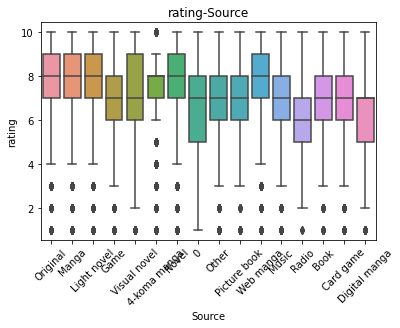

In [45]:
#범주형 컬럼 Source와 타겟간의 관계

sns.boxplot(data=df, x='Source', y='rating')
plt.title('rating-Source')
plt.xticks(rotation=45)

plt.show()

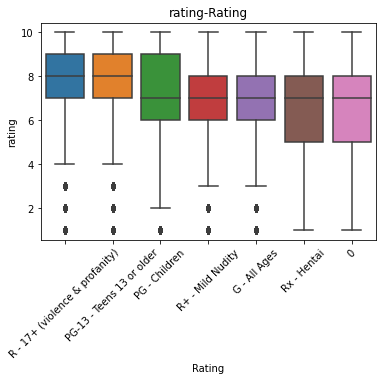

In [46]:
#범주형 컬럼 Rating과 타겟간의 관계

sns.boxplot(data=df, x='Rating', y='rating')
plt.title('rating-Rating')
plt.xticks(rotation=45)

plt.show()

In [47]:
# # 수치형 컬럼과 타겟과의 관계

# sns.scatterplot(data=df, x='GrLivArea', y='rating')
# plt.title('SalePrice - OverallQual')

# plt.show()

###4) EDA

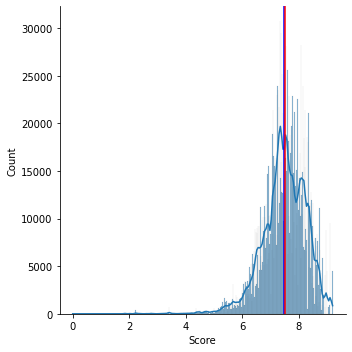

In [48]:
#df Score 분포

sns.displot(df['Score'], kde=True)
plt.axvline(df['Score'].mean(), color='blue')
plt.axvline(df['Score'].median(), color='red')
plt.show()

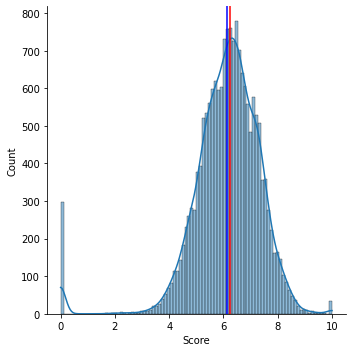

In [49]:
#df_anime Score 분포

sns.displot(df_anime['Score'],kde=True)
plt.axvline(df_anime['Score'].mean(),color='blue')
plt.axvline(df_anime['Score'].median(),color='red')
plt.show()

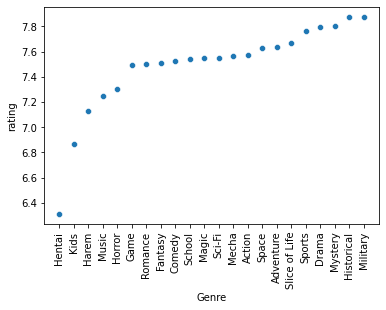

In [124]:
#Genre별 rating 평균

genres=['Action', 'Adventure', 'Comedy', 'Slice of Life', 'Drama',
       'Sci-Fi', 'Game', 'Harem', 'Military', 'Space', 'Music', 'Mecha',
       'Historical', 'Mystery', 'School', 'Hentai', 'Fantasy', 'Horror',
       'Kids', 'Sports', 'Magic', 'Romance']

gr=[]
for genre in genres:
  gr.append(df[df[genre]==1].rating.mean())

genre_rating=pd.DataFrame()
genre_rating['Genre']=genres
genre_rating['rating']=gr

sns.scatterplot(data=genre_rating.sort_values('rating'),x='Genre',y='rating')
plt.xticks(rotation=90)
plt.show()

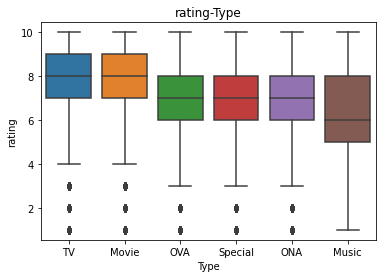

In [62]:
#Type별 rating 분포

sns.boxplot(data=df, x='Type', y='rating')
plt.title('rating-Type')

plt.show()

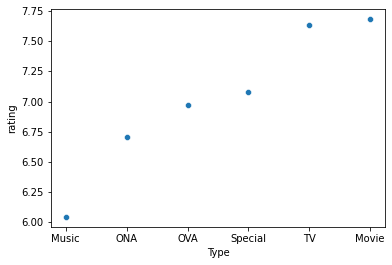

In [128]:
type_rating=df.groupby('Type').mean().rating.sort_values()

sns.scatterplot(data=type_rating)
plt.show()

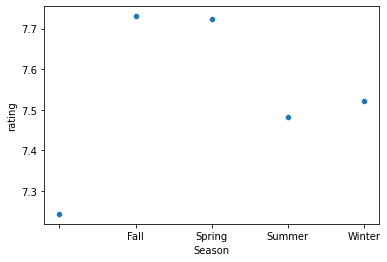

In [129]:
#Season별 rating 분포

season_rating=df.groupby('Season').mean().rating

sns.scatterplot(data=season_rating)
plt.show()

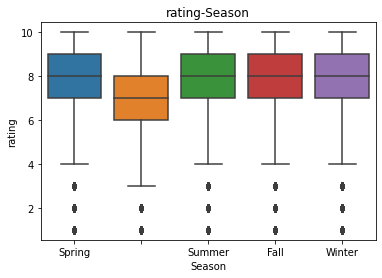

In [125]:
sns.boxplot(data=df, x='Season', y='rating')
plt.title('rating-Season')

plt.show()

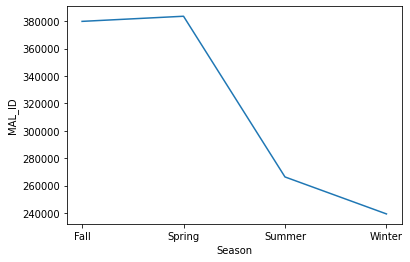

In [85]:
season_count=df.groupby('Season').count().MAL_ID

sns.lineplot(data=season_count)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


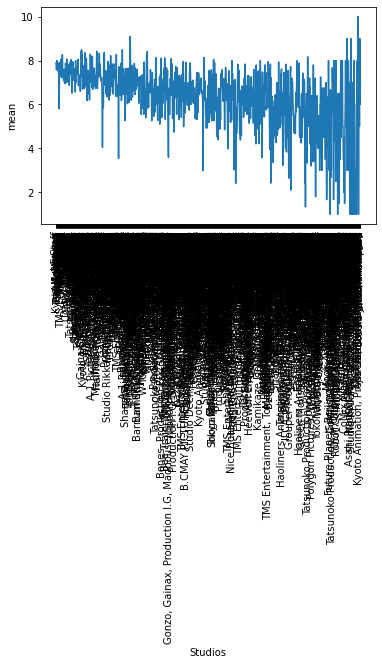

In [97]:
#Studios와 rating

studios_rating=df.groupby('Studios').mean().rating
studios_count=df.groupby('Studios').count().MAL_ID
df_studios=pd.DataFrame()
df_studios['mean']=studios_rating
df_studios['count']=studios_count
df_studios=df_studios.sort_values('count',ascending=False)
sns.lineplot(data=df_studios['mean'])
plt.xticks(rotation=90)
plt.show()

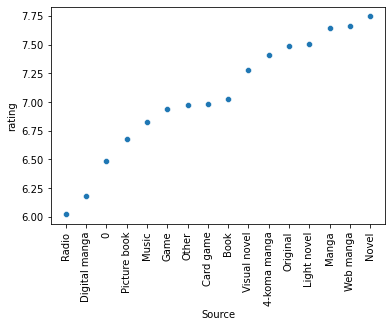

In [130]:
#Source별 rating 분포

source_rating=df.groupby('Source').mean().rating.sort_values()

sns.scatterplot(data=source_rating)
plt.xticks(rotation=90)
plt.show()

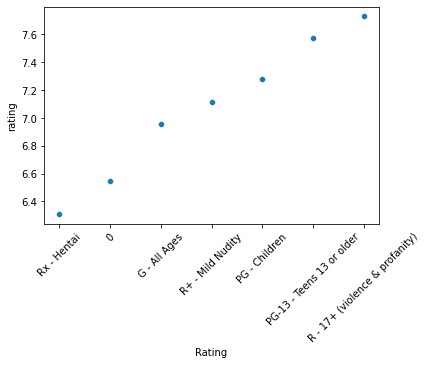

In [145]:
#Rating별 rating 분포

Rating_rating=df.groupby('Rating').mean().rating.sort_values()

sns.scatterplot(data=Rating_rating)
plt.xticks(rotation=45)
plt.show()

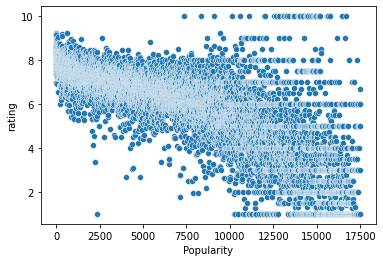

In [176]:
#Popularity과 rating

popularity_rating=df.groupby('Popularity').mean().rating

sns.scatterplot(data=popularity_rating)
plt.show()

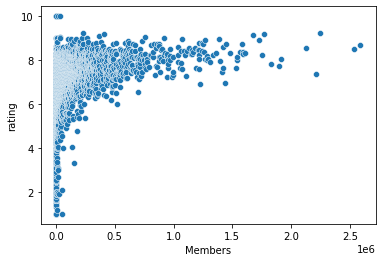

In [173]:
#Members와 rating

members_rating=df.groupby('Members').mean().rating

sns.scatterplot(data=members_rating)
plt.show()

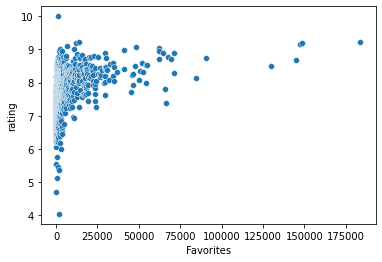

In [175]:
#Favorites과 rating

favorites_rating=df.groupby('Favorites').mean().rating

sns.scatterplot(data=favorites_rating)
plt.show()

##3. 가설 검정